In [1]:
#loading the required libraries
from fastai import *
from fastai.vision import *
from fastai.vision import image
#from fastai.vision.widgets import *

In [2]:
import os
import pandas as pd
import numpy as np
import cv2

### Loading the model for making the predictions

In [4]:
model4_test=load_learner(path=r"D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train",file='fastai_emojis_model4.pkl')

In [5]:
model4_test.dl

<bound method Learner.dl of Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3

In [6]:
os.chdir(r'D:\Data science\Alma better\DL Facial emotion recognition\Images\images\validation\surprise')

### Some test predictions on an image

In [7]:
test1=cv2.imread('./330.jpg')
t = pil2tensor(test1, dtype=np.float32) # converts to numpy tensor
#t = t.permute(2,0,1) # Move num_channels as first dimension
t = t.float()/255.0
im = Image(t) # Convert to fastAi Image - this class has "apply_tfms" 
model4_test.predict(im)

(Category tensor(6),
 tensor(6),
 tensor([1.9038e-03, 1.4704e-04, 7.8215e-02, 4.7267e-03, 1.0939e-02, 1.2342e-02,
         8.9173e-01]))

<AxesSubplot:>

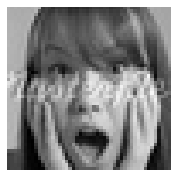

In [8]:
show_image(im)

In [9]:
model4_test.predict(im)[0]

Category tensor(6)

In [10]:
type(model4_test.predict(im)[0])

fastai.core.Category

In [11]:
model4_test

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1

In [12]:
os.getcwd()

'D:\\Data science\\Alma better\\DL Facial emotion recognition\\Images\\images\\validation\\surprise'

In [13]:
os.chdir('D:/Data science/Alma better/DL Facial emotion recognition/Images/images/validation/happy')

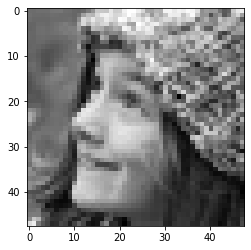

In [14]:
#path='./531.jpg'
img = cv2.imread('./531.jpg')
plt.imshow(img)

#### Testing on different category images

In [15]:
os.chdir('D:/Data science/Alma better/DL Facial emotion recognition/Images/images/validation/surprise')

In [16]:
a3=cv2.imread('./10162.jpg')
t = pil2tensor(a3, dtype=np.float32) # converts to numpy tensor
t = t.float()/255.0
#t = t.permute(2,0,1) # Move num_channels as first dimension
im = Image(t) # Convert to fastAi Image - this class has "apply_tfms" 
pred0=model4_test.predict(im)
print(pred0)
print(str(pred0[0]))

(Category tensor(6), tensor(6), tensor([4.0323e-03, 2.5787e-04, 1.5208e-01, 1.1300e-02, 9.9413e-03, 3.4701e-02,
        7.8768e-01]))
surprise


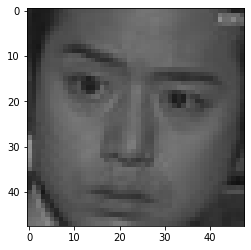

In [17]:
a1=cv2.imread('./10097.jpg')
plt.imshow(a1)

In [18]:
#not used just for experimentation
Emojis_dict = {'Category tensor(0)':"Angry", 'Category tensor(1)':"Disgust", 'Category tensor(2)':"Fear", 'Category tensor(3)':"Happy",\
               'Category tensor(4)':"Neutral", 'Category tensor(5)':"Sad", 'Category tensor(6)':"Surprise"}

### Images emotion detection pipeline

In [50]:
def prediction(img1):
    predictions = []
    
    predictions = model4_test.predict(img1)
    predictions[0]
    #print(predictions)
    #type(predictions)
    prediction1=[]
    prediction1=str(predictions[0])
    #emotion = []
    #emotion = Emojis_dict[predictions1]
    if prediction1 == 'angry':
        print("The person here is angry")
    elif prediction1 == 'disgust':
        print("The person here is disgusted")
    elif prediction1 == 'fear':
        print("The person here is in fear")
    elif prediction1 == 'happy':
        print("The person here is happy")   
    elif prediction1 == 'neutral':
        print("The person here is neutral")
    elif prediction1 == 'sad':
        print("The person here is sad")
    elif prediction1 == 'surprise':
        print("The person here is surprised")
    else:
        print("Cannot detect")
    #cv2.destroyWindow("preview")

In [51]:
def return_prediction(path):
    #converting image to gray scale and save it
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)
    
    #detect face in image, crop it then resize it then save it
    #face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]
        cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
    
    #read the processed image then make prediction and display the result
    read_image = cv2.imread(path)
    t = pil2tensor(read_image, dtype=np.float32) # converts to numpy tensor
    t = t.float()/255.0
    #t = t.permute((2,0,1))
    #t=t.transpose((2,0,1))
    
    img1 = Image(t) # Convert to fastAi Image - this class has "apply_tfms" 

    model_pred1 = model4_test.predict(img1)[0]
    predicted=prediction(img1)  #uncomment when above type of display text is required for image outputs
    plt.imshow(img)  #uncomment if image has to be displayed
    return str(model_pred1)

In [23]:
t.shape

torch.Size([3, 48, 48])

In [70]:
a5 = t.float()/255.0

In [71]:
a5.shape

torch.Size([3, 48, 48])

In [72]:
a9=a5.permute(2,0,1).shape

In [74]:
a9

torch.Size([48, 3, 48])

The person here is surprised


'surprise'

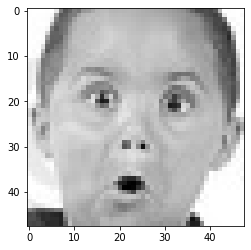

In [22]:
return_prediction('./10259.jpg')

In [23]:
os.getcwd()

'D:\\Data science\\Alma better\\DL Facial emotion recognition\\Images\\images\\validation\\surprise'

The person here is in fear


'fear'

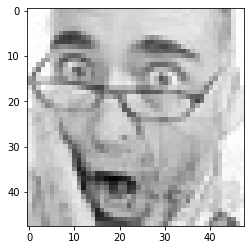

In [24]:
return_prediction('./10306.jpg')

In [25]:
c=Emojis_dict['Category tensor(3)']

In [26]:
#experimentation
for i in range(len(Emojis_dict)):
    if c=='Happy':
        print('Yes Happy face')
    else:
        print('Cannot detect')
prediction1=str('Category tensor(3)')
type(prediction1)

Yes Happy face
Yes Happy face
Yes Happy face
Yes Happy face
Yes Happy face
Yes Happy face
Yes Happy face


str

In [28]:
#btn_upload = widgets.FileUpload()
#out_pl = widgets.Output()
#lbl_pred = widgets.Label()

### Emotion detection pipeline for detection on videos

In [54]:
def test_rerun(text, cap):
    while(True):
        ret, img = cap.read()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, "The last phase of the person's Emotion was recorded "+str(text), (95,30), font, 1.0, (255, 0, 0), 2, cv2.LINE_AA)
        
        cv2.putText(img, "Press SPACE: Detecting", (5,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
    
        cv2.putText(img, "Hold Q: To Quit😎", (460,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
    
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
        
        cv2.imshow("Image", img)

        
        if cv2.waitKey(1) == ord(' '):
            cv2.imwrite("test6.jpg", img)
            text = return_prediction("test6.jpg")
            test_video_pred(text, cap)
            break
            
        if cv2.waitKey(1) == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

In [55]:
os.getcwd()

'D:\\Data science\\Alma better\\DL Facial emotion recognition\\Images\\images\\Input and output'

In [56]:
os.chdir(r'D:\Data science\Alma better\DL Facial emotion recognition\Images\images\Input and output')

In [57]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#cap = cv2.VideoCapture('./pexels-tiger-lily-7149007.mp4')

def test_video_pred(text, cap):
    while(True):
        ret, img = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, "The last phase of person's emotion was recorded: "+str(text), (95,30), font, 1.0, (255, 0, 0), 2, cv2.LINE_AA)
        
        cv2.putText(img, "Press SPACE: For detection", (5,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
    
        cv2.putText(img, "Hold Q: To Quit😎", (460,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
    
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
        
        cv2.imshow("Image", img)
        
        if cv2.waitKey(1) == ord(' '):
            cv2.imwrite("test6.jpg", img)
            text = return_prediction("test6.jpg")
            test_rerun(text, cap)
            #plt.imshow(img)
            break
            
        if cv2.waitKey(1) == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

### Examples

The person here is neutral
The person here is in fear
The person here is neutral
The person here is sad
The person here is neutral
The person here is neutral
The person here is sad
The person here is neutral
The person here is neutral
The person here is sad
The person here is sad
The person here is neutral
The person here is neutral
The person here is sad
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is sad
The person here is neutral
The person here is neutral
The person here is sad
The person here is neutral
The person here is sad
The person here is neutral
The person here is sad
The person here is neutral
The person here is sad
The person here is sad
The person here is neutral
The person here is sad
The person here is sad
The person here is sad
The person here is sad


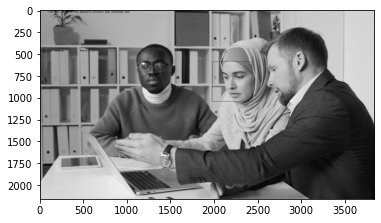

In [31]:
cap = cv2.VideoCapture('./pexels-tiger-lily-7149007.mp4')
test_video_pred('None',cap)

I guess you are neutral
I guess you are neutral
I guess you are neutral
I guess you are neutral
I guess you are neutral
I guess you are neutral
I guess you are neutral
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are neutral
I guess you are neutral
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are neutral
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy
I guess you are happy


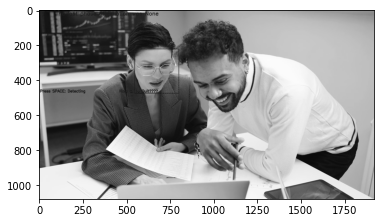

In [37]:
cap=cv2.VideoCapture('./pexels-yan-krukov-7693411.mp4')
test_video_pred('None',cap)

### 🤩😃
- It says the people in the video are in neutral and happy emotions. Yes!!Yayy!!!
- Its working well

The person here is neutral
The person here is sad
The person here is sad
The person here is sad
The person here is neutral
The person here is sad
The person here is neutral
The person here is sad
The person here is sad
The person here is sad
The person here is sad
The person here is sad
The person here is sad
The person here is sad
The person here is sad
The person here is neutral
The person here is neutral
The person here is neutral
The person here is sad
The person here is sad
The person here is sad
The person here is sad
The person here is sad
The person here is sad
The person here is sad
The person here is sad


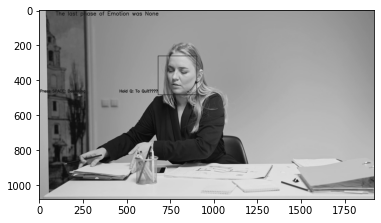

In [93]:
cap=cv2.VideoCapture('./pexels-yan-krukov-7640073.mp4')
test_video_pred('None',cap)

The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
The person here is neutral
Th

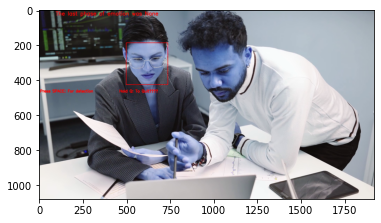

In [153]:
test_video_pred('None',cap)

In [33]:
os.chdir(r'D:\Data science\Alma better\DL Facial emotion recognition\Images\images\validation\fear')

The person here is in fear


'fear'

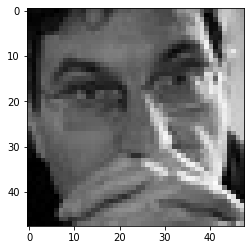

In [34]:
return_prediction('./10099.jpg')

### Live video emotion detection

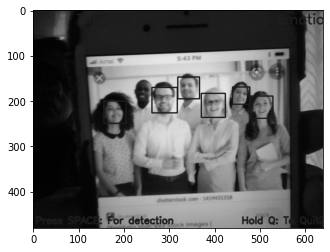

In [49]:
cap=cv2.VideoCapture(0)
test_video_pred('None',cap)

The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is sad
The person here is neutral
The person here is neutral
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is sad
The person here is sad
The person here is sad
The person here is sad
The person here is happy
The person here is happy
The person here is happy
The person here is happy
The person here is angry
The person here is happy
The person here is angry
The person here is happy
The person here is angry
The person here is angry
The person here is sad
The person here is neutral
The person here is angry
The person here is angry
The pe

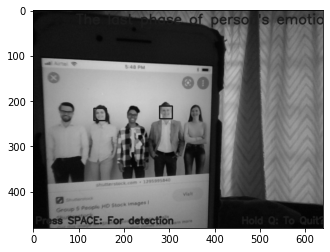

In [59]:
cap=cv2.VideoCapture(0)
test_video_pred('None',cap)

- Here I'm holding the mobile from which it is detecting the emotion of the people in it
- It is able to detect everymoment from the live video as soon as the person comes into the picture
- Here I have used Resnet34 transfer learning(using fastai) for detecting the emotion of the person or the people.